In [1]:
!pip install --upgrade ctab-xtra-dp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [3]:
df = load_demo("car")
df = df.drop(columns=['Year','Model'])
df.head()

,Brand,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [5]:
from ctab_xtra_dp import CTAB_XTRA_DP, load_demo
import pandas as pd


# Initialize the model
synthesizer = CTAB_XTRA_DP(
    df=df,
    categorical_columns=["Brand","Fuel_Type","Transmission"],
    mixed_columns={},
    integer_columns=["Mileage",	"Doors",	"Owner_Count"]
)

# Train the model
synthesizer.fit(epochs=50)

Start training with 50 epochs
 5 critic iterations
 20 steps per epoch
 batch size 500


100%|██████████| 50/50 [08:04<00:00,  9.68s/it]


In [6]:
syn = synthesizer.generate_samples(n=df.shape[0])

In [7]:
syn.head()

,Brand,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Chevrolet,1.1,Electric,Manual,20923,3,5,11008
1,Hyundai,1.4,Hybrid,Semi-Automatic,89516,3,2,2871
2,Volkswagen,2.3,Hybrid,Semi-Automatic,142053,4,4,14983
3,Ford,1.3,Electric,Manual,116530,2,3,9770
4,Hyundai,4.3,Diesel,Manual,30789,5,5,11004


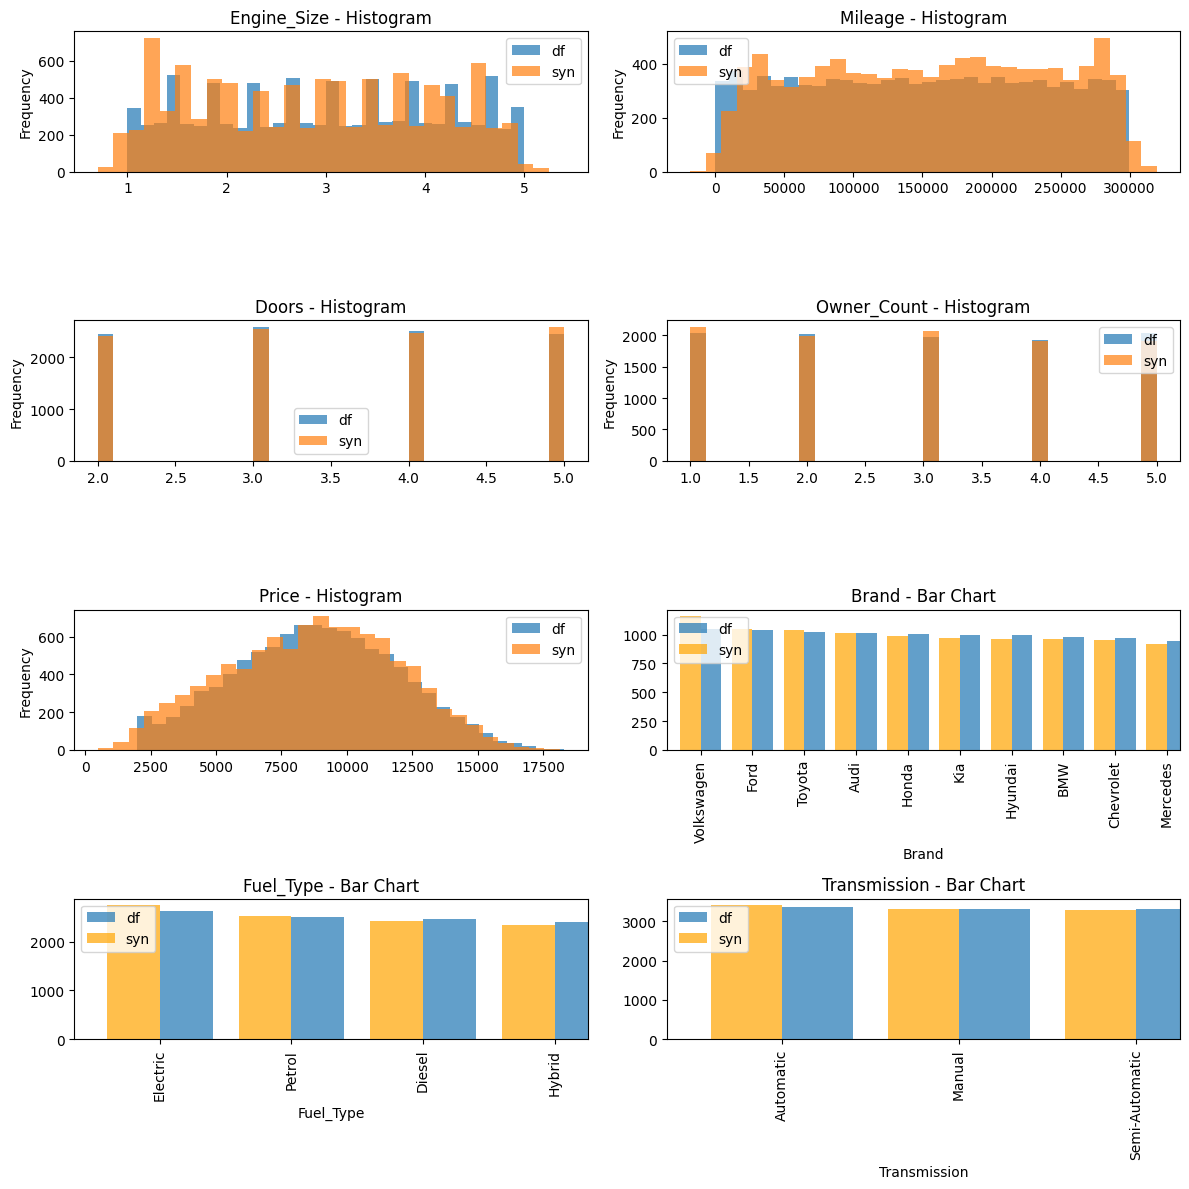

In [9]:
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(exclude=['number']).columns

# Set up subplots dynamically
total_cols = len(df.columns)
num_rows = (total_cols + 1) // 2  # Ensure enough rows
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 12))

# Flatten axes into a 1D array for easier indexing
axes = axes.ravel()

# Plot Numerical Columns (Histogram)
for i, column in enumerate(num_cols):
    df[column].plot(kind='hist', ax=axes[i], bins=30, alpha=0.7, label='df')
    syn[column].plot(kind='hist', ax=axes[i], bins=30, alpha=0.7, label='syn')
    axes[i].set_title(f'{column} - Histogram')
    axes[i].legend()

# Plot Categorical Columns (Bar Chart)
for i, column in enumerate(cat_cols, start=len(num_cols)):
    df[column].value_counts().plot(kind='bar', ax=axes[i], alpha=0.7, position=0, width=0.4, label='df')
    syn[column].value_counts().plot(kind='bar', ax=axes[i], alpha=0.7, position=1, width=0.4, label='syn', color='orange')
    axes[i].set_title(f'{column} - Bar Chart')
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [11]:
from ctab_xtra_dp import stat_sim

cat_columns = ["Brand","Fuel_Type","Transmission"]
stat_metrics = stat_sim(df, syn, cat_cols=cat_columns)

column:  Brand JSD:  0.023448081641246624
column:  Engine_Size WD:  0.0337775
column:  Fuel_Type JSD:  0.01893681128306291
column:  Transmission JSD:  0.008028543752159088
column:  Mileage WD:  0.021397016891058343
column:  Doors WD:  0.008866666666666643
column:  Owner_Count WD:  0.011100000000000006
column:  Price WD:  0.010757800134961044


In [12]:
from ctab_xtra_dp.evaluation import privacy_metrics

# Assess privacy protection
privacy_results = privacy_metrics(
    real=df,
    fake=synthetic_data,
    data_percent=15  # Percentage of data to sample for efficiency
)

ModuleNotFoundError: No module named 'ctab_xtra_dp.evaluation'

In [ ]:


# Generate samples with specific conditions
synthetic_data_bachelors = synthesizer.generate_samples(
    n=500,
    conditioning_column='education',
    conditioning_value='Bachelors'
)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,4,0,3,4,0,0,0,30,39,0


In [ ]:
synthesizer = CTAB_XTRA_DP(
    df=df,
    categorical_columns=['workclass', 'education', 'marital-status', 'occupation',
                         'relationship', 'race', 'gender', 'native-country'],
    mixed_columns={'capital-loss': [0],'capital-gain': [0]},
    integer_columns=['age', 'hours-per-week']
)

synthesizer.fit(1)


AttributeError: 'NoneType' object has no attribute 'values'